# This notebook plays with the simplistic hamiltonian:
$H = Fcos(\omega_d t)\sigma_z + \omega /2 \sigma_z$

In [13]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from Hamiltonian import Hamiltonian
import matplotlib as mpl

# Resonance case, transformed

In [485]:
N = 2
F = 1
wa = 100
w = 100

sigma_x = tensor(qeye(N), sigmax())
sigma_z = -tensor(qeye(N), sigmaz())
coeff = coefficient(lambda t: np.cos(w*t))

H_untr = (F*sigma_x)*coeff + wa/2 * sigma_z
H = (F*sigma_x)/2 + wa/2 * sigma_z

In [487]:
H.eigenenergies()

array([-50.00249994, -50.00249994,  50.00249994,  50.00249994])

In [488]:
print(1/2 * np.sqrt(w**2 + F**2))

50.002499937503124


# Off resonance, RWA vs no RWA

In [24]:
N = 3
F = 1
wa = 5
w = 10

sigma_z = - tensor(qeye(N), sigmaz())

sig_p = tensor(qeye(N), sigmam())
sig_m = tensor(qeye(N), sigmap())
RWA_sig_p_term = coefficient(lambda t: np.exp( (1j)*(wa-w)*t ))
RWA_sig_m_term = coefficient(lambda t: np.exp( (-1j)*(wa-w)*t ))
noRWA_sig_p_term = coefficient(lambda t: np.exp( (1j)*(wa+w)*t ))
noRWA_sig_m_term = coefficient(lambda t: np.exp( (-1j)*(wa+w)*t ))

H_RWA = F/2 * (sig_p*RWA_sig_p_term + sig_m*RWA_sig_m_term) + wa/2 * sigma_z
H_NORWA = F/2 * (sig_p*RWA_sig_p_term + sig_m*RWA_sig_m_term + sig_p*noRWA_sig_p_term + sig_m*noRWA_sig_m_term)+ wa/2 * sigma_z

In [25]:
psi0 = tensor(basis(N, 2), basis(2, 0))
psi1 = tensor(basis(N, 1), basis(2, 1))
times = np.linspace(0.0, 10, 5000)
results_rwa = mesolve(H_RWA, psi0, times).states
results_norwa = mesolve(H_NORWA, psi0, times).states
P_2_RWA = [np.abs((results_rwa[i].overlap(psi0)))**2 for i in range(len(times))]
P_2_noRWA = [np.abs((results_norwa[i].overlap(psi0)))**2 for i in range(len(times))]

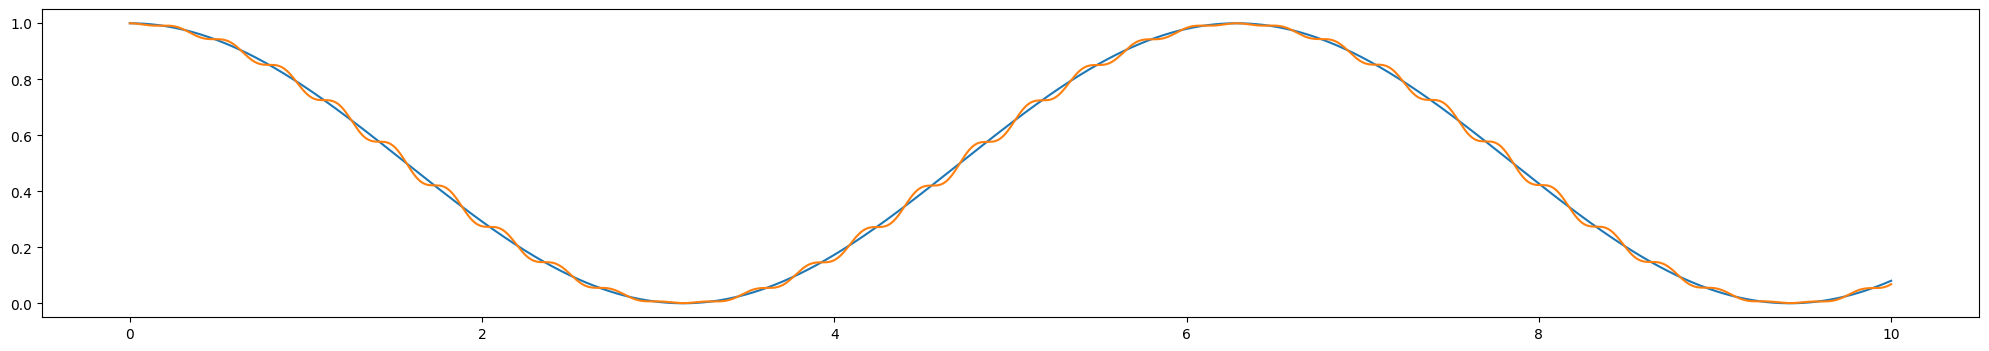

In [26]:
plt.plot(times, P_2_RWA)
plt.plot(times, P_2_noRWA)

# Un-transformed raw

In [313]:
N = 5
F = 1
wa = 100
w = 100

sig_p = tensor(qeye(N), sigmam())
sig_m = tensor(qeye(N), sigmap())
sigma_z = -tensor(qeye(N), sigmaz())
sigma_x = tensor(qeye(N), sigmax())
coeff = coefficient(lambda t: np.cos(w*t))
RWA_sig_p_term = coefficient(lambda t: np.exp( (1j)*(wa-w)*t ))
RWA_sig_m_term = coefficient(lambda t: np.exp( (-1j)*(wa-w)*t ))
noRWA_sig_p_term = coefficient(lambda t: np.exp( (1j)*(wa+w)*t ))
noRWA_sig_m_term = coefficient(lambda t: np.exp( (-1j)*(wa+w)*t ))



H_untr = (F*sigma_x)*coeff + wa/2 * sigma_z
H_RWA = F/2 * (sig_p*RWA_sig_p_term + sig_m*RWA_sig_m_term)
H_NORWA = F/2 * (sig_p*RWA_sig_p_term + sig_m*RWA_sig_m_term + sig_p*noRWA_sig_p_term + sig_m*noRWA_sig_m_term)

In [314]:
psi0 = tensor(basis(N, 1), basis(2, 1))
psi1 = tensor(basis(N, 1), basis(2, 0))
times = np.linspace(0.0, 10, 5000)
results_no_tr = mesolve(H_untr, psi0, times).states
results_RWA = mesolve(H_RWA, psi0, times).states
results_noRWA = mesolve(H_NORWA, psi0, times).states
P_2_notr = [np.abs((results_no_tr[i].overlap(psi1)))**2 for i in range(len(times))]
P_2_RWA = [np.abs((results_RWA[i].overlap(psi1)))**2 for i in range(len(times))]
P_2_NORWA = [np.abs((results_noRWA[i].overlap(psi1)))**2 for i in range(len(times))]

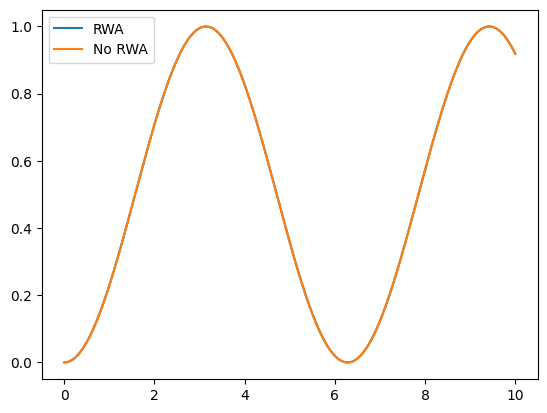

In [315]:
# plt.plot(times, P_2_notr, label = 'untransformed')
plt.plot(times, P_2_RWA, label = 'RWA')
plt.plot(times, P_2_NORWA, label = 'No RWA')
plt.legend()

# Expectation values

In [288]:
N = 5
F = 1
wa = 100
w = 100

sig_p = tensor(qeye(N), sigmam())
sig_m = tensor(qeye(N), sigmap())
sigma_z = -tensor(qeye(N), sigmaz())
sigma_x = tensor(qeye(N), sigmax())
coeff = coefficient(lambda t: np.cos(w*t))
RWA_sig_p_term = coefficient(lambda t: np.exp( (1j)*(wa-w)*t ))
RWA_sig_m_term = coefficient(lambda t: np.exp( (-1j)*(wa-w)*t ))
noRWA_sig_p_term = coefficient(lambda t: np.exp( (1j)*(wa+w)*t ))
noRWA_sig_m_term = coefficient(lambda t: np.exp( (-1j)*(wa+w)*t ))


H_untr = (F*sigma_x)*coeff + wa/2 * sigma_z
H_RWA = F/2 * (sig_p*RWA_sig_p_term + sig_m*RWA_sig_m_term)
H_NORWA = F/2 * (sig_p*RWA_sig_p_term + sig_m*RWA_sig_m_term + sig_p*noRWA_sig_p_term + sig_m*noRWA_sig_m_term)

In [289]:
psi0 = tensor(basis(N, 1), basis(2, 1))
psi1 = tensor(basis(N, 1), basis(2, 0))
times = np.linspace(0.0, 1000, 10000)
results_no_tr = mesolve(H_untr, psi0, times, e_ops=H_untr).expect[0]
results_RWA = mesolve(H_RWA, psi0, times, e_ops=H_RWA).expect[0]
results_noRWA = mesolve(H_NORWA, psi0, times, e_ops=H_NORWA).expect[0]

P_2_notr = results_no_tr
P_2_RWA = results_RWA
P_2_NORWA = results_noRWA

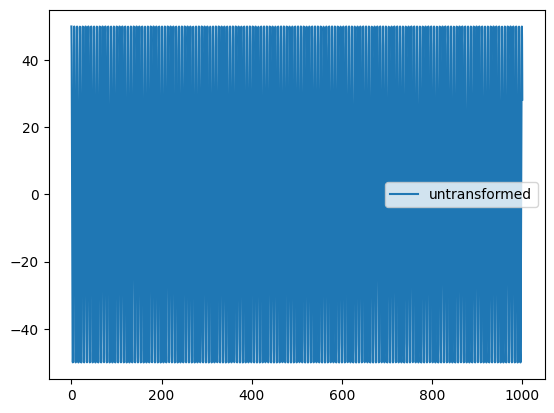

0.006925247121108417
-0.0012819389164666262


In [294]:
plt.plot(times, P_2_notr, label = 'untransformed')
# plt.plot(times, P_2_NORWA, label = 'No RWA')
# plt.plot(times, P_2_RWA, label = 'RWA')
# plt.hlines(0.0, times[0], times[-1])
plt.legend()
plt.show()

print(np.average(P_2_notr/(2*np.pi)))
print(np.average(P_2_NORWA))

# Simplified, expanded cos

In [ ]:
N = 5
F = 1
wa = 10
w = 9.99

sig_p = tensor(qeye(N), sigmam())
sig_m = tensor(qeye(N), sigmap())
sigma_z = -tensor(qeye(N), sigmaz())
sigma_x = tensor(qeye(N), sigmax())
coeff = coefficient(lambda t: np.cos(w*t))
P_w = coefficient(lambda t: np.exp( (1j)*(w)*t ))
M_w = coefficient(lambda t: np.exp( (-1j)*(w)*t ))


H_RWA = F/2 * (sig_p*M_w + sig_m*P_w) + sigma_z*wa/2
H_NORWA = F/2 * (sig_p*P_w + sig_m*M_w) + sigma_z*wa/2 + F/2 * (sig_p*M_w + sig_m*P_w)

In [483]:
psi0 = tensor(basis(N, 1), basis(2, 0))
psi1 = tensor(basis(N, 1), basis(2, 1))
times = np.linspace(0.0, 100, 1000)
# results_no_tr = mesolve(H_untr, psi0, times, e_ops=H_untr).expect[0]
results_rwa = mesolve(H_RWA, psi0, times).states
results_norwa = mesolve(H_NORWA, psi0, times).states
P_2_RWA = [np.abs((results_rwa[i].overlap(psi1)))**2 for i in range(len(times))]
P_2_noRWA = [np.abs((results_norwa[i].overlap(psi1)))**2 for i in range(len(times))]


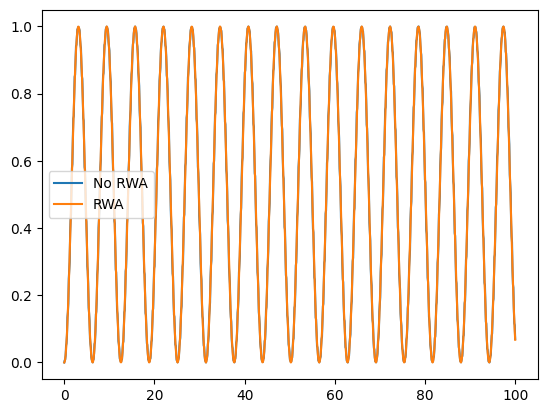

In [484]:
# plt.plot(times, P_2_notr, label = 'untransformed')
plt.plot(times, P_2_noRWA, label = 'No RWA')
plt.plot(times, P_2_RWA, label = 'RWA')
# plt.hlines(0.0, times[0], times[-1])
plt.legend()
plt.show()


In [11]:
wa= 1
# d = wa-wc
Omega = 0.01
N= 20
w = wa
f = 0.01
strength = []
wcs = []

psi0 = tensor(fock(N, 1), fock(2,0))
psi1 = tensor(fock(N, 1), fock(2,1))
e_N_1 = tensor(fock(N, N-1), fock(2,1))
g_N_1 = tensor(fock(N, N-1), fock(2,0))

wcs = np.linspace(0.8, 1.2, 50)
i= 0

# f = np.linspace(0, 1.5, 100)

for wc in wcs:
    print(i)
    i+=1
        
    H_JC_rwa_driven = Hamiltonian( wa, wc, Omega, w, f, N, True, True).H_JC
    # H_JC_rwa_nondriven = Hamiltonian( wa, wc, Omega, w, f, N, True, False).H_JC
    # H_JC_nonrwa_driven = Hamiltonian( wa, wc, w, f, Omega, N ,False,True).H_JC
    # H_JC_nonrwa_nondriven = Hamiltonian( wa, wc, w, f, Omega, N ,False,False).H_JC
    times = np.linspace(0.0, 40*np.pi/f, 1000)
    tau =times
    mpl.rc("figure", figsize=(25, 4))
    results_rwa_driven=mesolve(H_JC_rwa_driven,psi0, tau)
    states_rwa_driven=results_rwa_driven.states

    # results_rwa_nondriven=mesolve(H_JC_rwa_nondriven, psi0, tau)
    # states_rwa_nondriven=results_rwa_nondriven.states

    # results_nonrwa_driven=mesolve(H_JC_nonrwa_driven, psi0, tau)
    # states_nonrwa_driven=results_nonrwa_driven.states

    # results_nonrwa_nondriven=mesolve(H_JC_nonrwa_nondriven, psi0, tau)
    # states_nonrwa_nondriven=results_nonrwa_nondriven.states

    # Visualize the results
    expect_rwa_driven_gg = [np.abs(((states_rwa_driven[i].overlap(psi0))))**2 for i in range(len(tau))]
    expect_rwa_driven_g = [np.abs(((states_rwa_driven[i].overlap(psi1))))**2 for i in range(len(tau))]

    strength.append(np.min(np.array(expect_rwa_driven_g)+np.array(expect_rwa_driven_gg)))
    # wcs.append(wc)
plt.plot(wcs, 1-np.array(strength))
plt.show()


0
1
2
3


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (50,) and (3,)

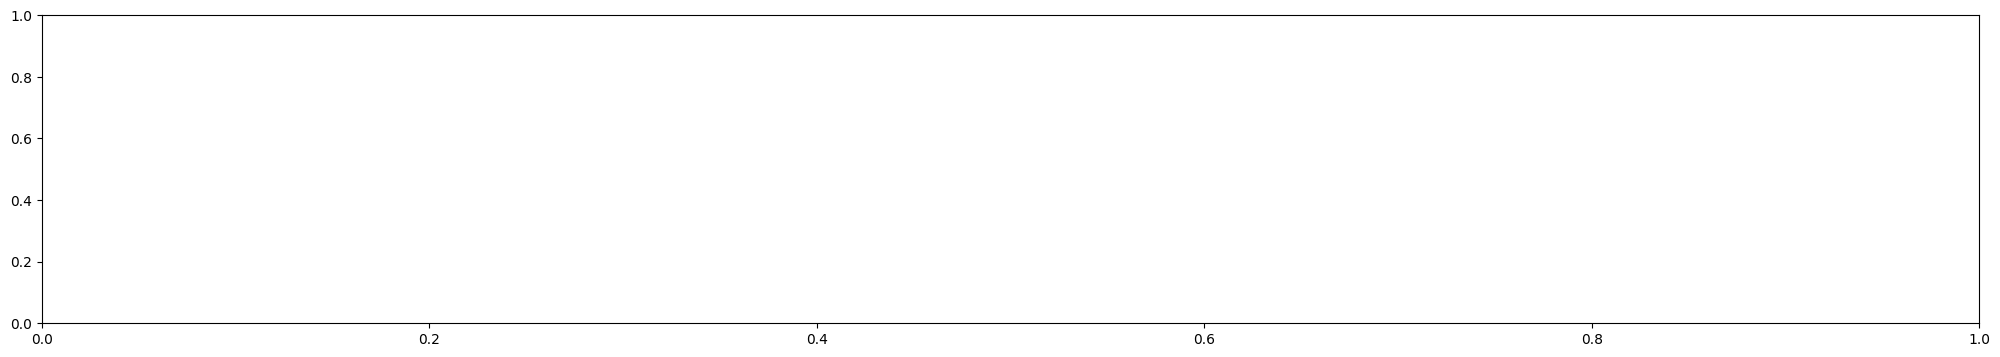

In [12]:
plt.plot(wcs, 1-np.array(strength))
plt.show()
